In [1]:
import pandas as pd

# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Membaca dataset lewat google drive
path = path = "/content/gdrive/MyDrive/Praktikum02/Praktikum5"

In [4]:
!ls "{path}/data"

Iris.csv  stunting_wasting_dataset.csv


In [5]:
# Kode ini digunakan untuk membaca dataset Iris dari file CSV yang tersimpan di Google Drive.
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum02/Praktikum5/data/Iris.csv')

In [6]:
# Cetak header data (5 baris data) dari file
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
# Cek duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Mengubah data ke numerik
species_map = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

df['Species'] = df['Species'].map(species_map)

In [10]:
iris_data = df.drop(columns=['Id'])
X = iris_data.drop(columns=['Species'])
y = iris_data['Species']

In [11]:
# Split dataset menjadi training dan testing dengan stratify pada label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
print(f"\n Jumlah Data Training: {X_train.shape[0]}")
print(f" Jumlah Data Testing: {X_test.shape[0]}")


 Jumlah Data Training: 120
 Jumlah Data Testing: 30


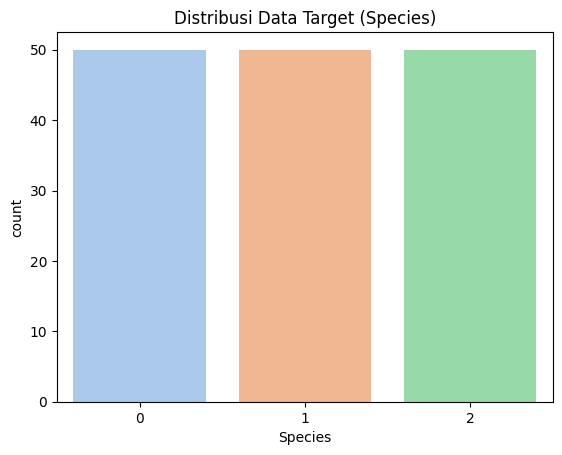

In [13]:
sns.countplot(x='Species', hue='Species', data=df, palette='pastel', legend=False)
plt.title('Distribusi Data Target (Species)')
plt.show()

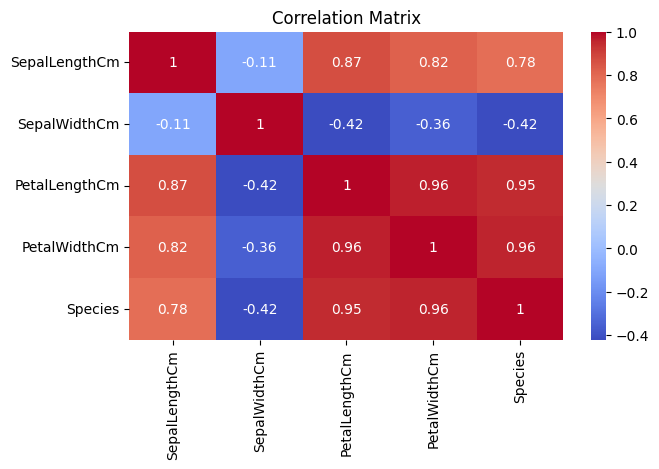

In [14]:
# menampilkan hubungan atau korelasi antar fitur numerik pada dataset dalam bentuk heatmap

plt.figure(figsize=(7, 4))
sns.heatmap(iris_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
# Buat Model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [16]:
# Evaluasi Model
y_pred = model.predict(X_test)
print("\nAkurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



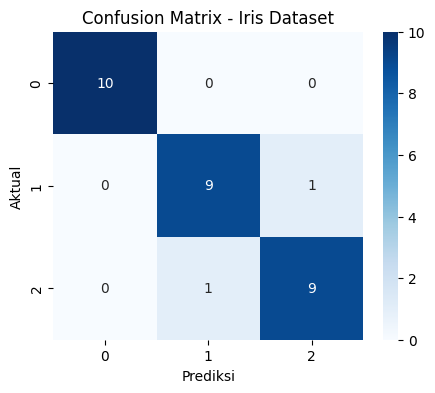

In [17]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Iris Dataset")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

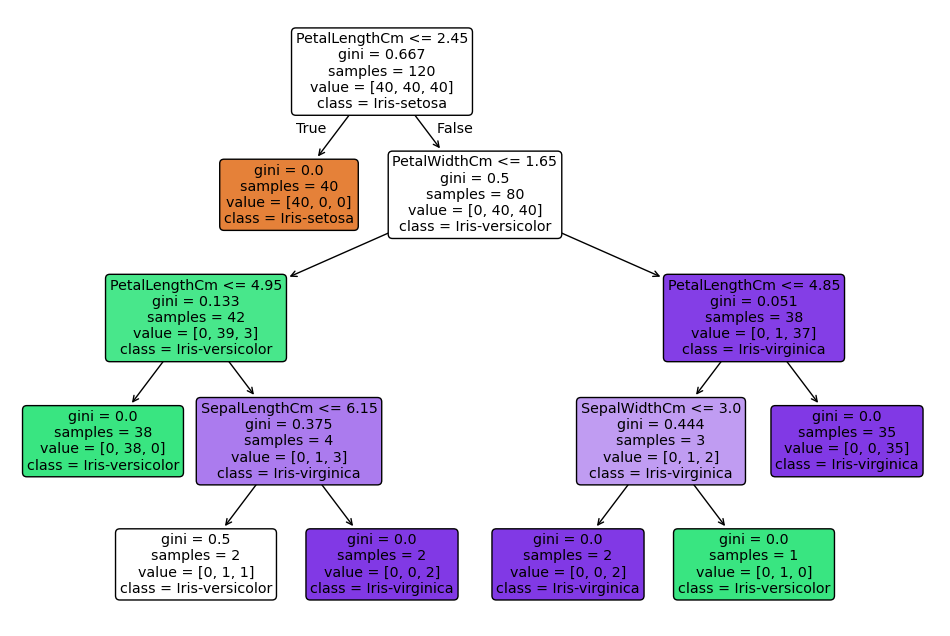

In [18]:
# Visualisasi Decision Tree
plt.figure(figsize=(12,8))

# Create a list of string class names based on the numerical classes
class_names_str = [list(species_map.keys())[i] for i in model.classes_]

plot_tree(model, feature_names=X.columns, class_names=class_names_str, filled=True, rounded=True)
plt.show()

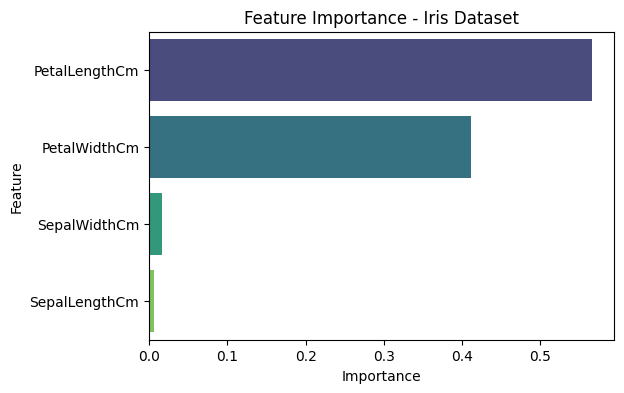

In [19]:
# Feature Importance
fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=fi, palette='viridis', legend=False)
plt.title("Feature Importance - Iris Dataset")
plt.show()

In [20]:
# Mencari Best max_depth
scores = {}
for i in range(2, 9):   # coba max_depth dari 2 sampai 8
    m = DecisionTreeClassifier(max_depth=i, random_state=42)
    m.fit(X_train, y_train)
    scores[i] = accuracy_score(y_test, m.predict(X_test))

best_i = max(scores, key=scores.get)
print("Best max_depth:", best_i, "| Akurasi:", round(scores[best_i]*100, 2), "%")

Best max_depth: 3 | Akurasi: 96.67 %
